# House Sales Price Prediction Analysis
**Final Project - Data Analyst Role for Real Estate Investment Trust**

This notebook walks through the analysis and modeling of house prices in King County.
Each section corresponds to one of the 10 required questions for submission.


## Question 1
**Display the data types of each column using `dtypes`.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

# Download kc_house_data.csv from Kaggle, put it in your working directory, and use:
df = pd.read_csv("kc_house_data.csv")  # <-- Make sure this file exists in your folder
df.dtypes  # (or whatever next step)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Question 2
**Drop `id` and `Unnamed: 0`, then describe the dataset.**

In [2]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 3
**Use `value_counts` on `floors` and convert to a DataFrame.**

In [3]:
floors_df = df['floors'].value_counts().to_frame(name='count')
floors_df

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Question 4
**Boxplot: Determine if waterfront homes have more price outliers.**

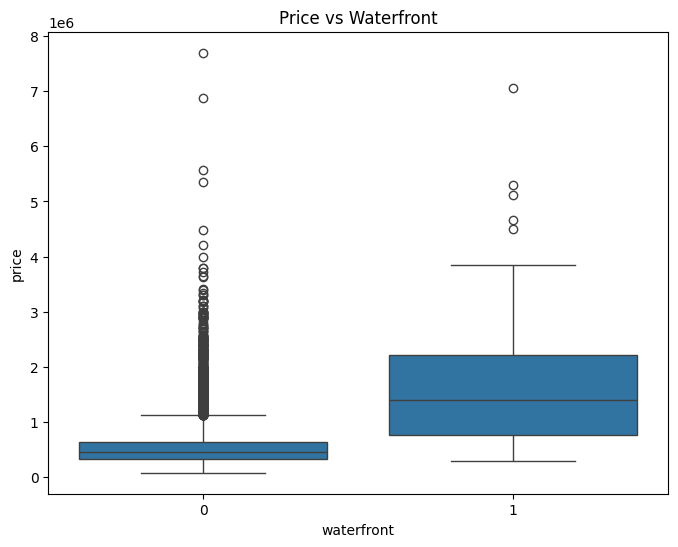

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price vs Waterfront')
plt.show()

## Question 5
**Use `regplot` to see if `sqft_above` is correlated with price.**

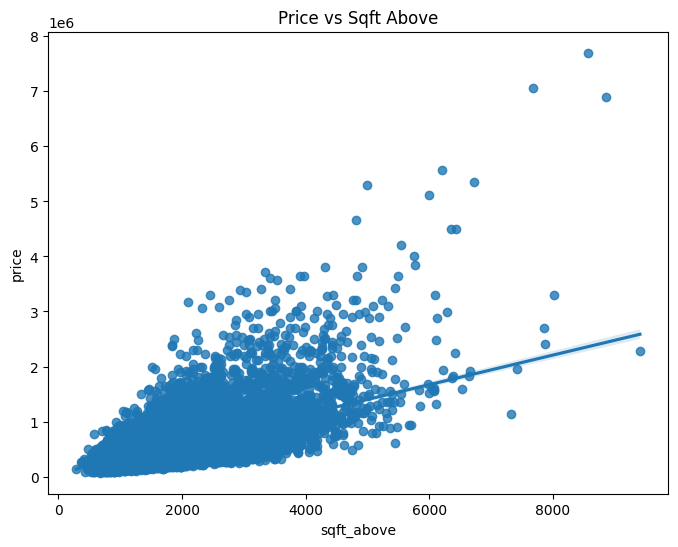

In [5]:
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs Sqft Above')
plt.show()

## Question 6
**Linear regression using `sqft_living` to predict price.**

In [6]:
X = df[['sqft_living']]
y = df['price']
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.4928532179037931

## Question 7
**Multiple linear regression using several features.**

In [7]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X_multi = df[features]
y = df['price']
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)
lm_multi.score(X_multi, y)

0.6577151058279324

## Question 8
**Create a pipeline with scaler, polynomial transform, and linear regression.**

In [8]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
pipe.fit(X_multi, y)
pipe.score(X_multi, y)

0.7513467656307783

## Question 9
**Train/test split with Ridge regression (`alpha=0.1`).**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.15, random_state=1)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6480374087702246

## Question 10
**Polynomial transform (degree=2) + Ridge regression (`alpha=0.1`) on train/test.**

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
ridge_poly.score(X_test_poly, y_test)

0.7004432069413513